# Data Analyzer
*   Jacob Yousif


## Importing the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%capture

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import re

## Loading the data

In [3]:
file_path = 'Datasets/ProcessedSegmentedLiterature.csv'
df = pd.read_csv(file_path)
main = df.copy()

In [4]:
df

Book  \
0       A Christmas Carol In Prose   
1       A Christmas Carol In Prose   
2       A Christmas Carol In Prose   
3       A Christmas Carol In Prose   
4       A Christmas Carol In Prose   
...                            ...   
106787                       Youth   
106788                       Youth   
106789                       Youth   
106790                       Youth   
106791                       Youth   

                                                     Text           Author  \
0       STAVE I: MARLEY'S GHOST MARLEY was dead: to be...  Charles Dickens   
1       Mind! I don't mean to say that I know, of my o...  Charles Dickens   
2       Scrooge knew he was dead? Of course he did. Ho...  Charles Dickens   
3       And even Scrooge was not so dreadfully cut up ...  Charles Dickens   
4       Scrooge never painted out Old Marley's name. T...  Charles Dickens   
...                                                   ...              ...   
106787  Imagine!" The Astronomer said, "Youth!" XIII T...     Isaac Asimov   
106788  All the remaining seventeen of the crew were d...     Isaac Asimov   
106789  The Merchant then said, "They've lined up to s...     Isaac Asimov   
106790  "Horrible-looking things, aren't they?" "Pleas...     Isaac Asimov   
106791  "That's a queer name for a monster. Makes me l...     Isaac Asimov   

        AuthorCode  AverageWordLength  AverageSentenceLength  \
0                2           3.776316              15.200000   
1                2           3.945513              20.800000   
2                2           4.017794              18.733333   
3                2           4.043478              21.466667   
4                2           3.945525              17.133333   
...            ...                ...                    ...   
106787           7           3.443820              11.866667   
106788           7           3.611702              12.533333   
106789           7           3.526316              11.400000   
106790           7           3.735632              11.600000   
106791           7           4.167464              13.933333   

        AverageSyllablePerWord  PunctuationCount  FunctionalWordsCount  \
0                     1.092105          0.039122              0.438596   
1                     1.176282          0.028056              0.458333   
2                     1.153025          0.027778              0.427046   
3                     1.136646          0.031190              0.397516   
4                     1.073930          0.037582              0.365759   
...                        ...               ...                   ...   
106787                0.932584          0.055707              0.404494   
106788                0.952128          0.055831              0.393617   
106789                0.964912          0.063114              0.403509   
106790                1.034483          0.063325              0.350575   
106791                1.200957          0.039729              0.377990   

        TypeTokenRatio  ...  SichelesMeasureS  Dihapax  YulesCharacteristicK  \
0             0.521930  ...          0.279070       12            194.675285   
1             0.567308  ...          0.220588       15            137.861604   
2             0.580071  ...          0.267717       17            148.554350   
3             0.593168  ...          0.209150       16            152.771884   
4             0.591440  ...          0.142857        9            204.545110   
...                ...  ...               ...      ...                   ...   
106787        0.561798  ...          0.463768       16            186.213862   
106788        0.574468  ...          0.513514       19            185.038479   
106789        0.608187  ...          0.368421       14            189.801990   
106790        0.637931  ...          0.272727       12            190.249703   
106791        0.688995  ...          0.333333       19            130.720451   

        SimpsonsI

In [5]:
print('The length of the dataset is:', str(len(df)))

The length of the dataset is: 106792


In [6]:
has_nan = df.isnull().values.any()
print(f"Are there any NaN values in the DataFrame? {has_nan}")

Are there any NaN values in the DataFrame? False


In [7]:
print(f"Does the DataFrame have any NaN values? {df.isna().sum().sum()}")

Does the DataFrame have any NaN values? 0


## Authors

In [8]:
plots_dir = 'Plots/Data/'

In [9]:
authors = df.groupby('AuthorCode').agg(SegmentCount=('AuthorCode', 'size'), Author=('Author', 'first')).reset_index()

In [10]:
authors = authors.sort_values(by='SegmentCount', ascending=True)

In [11]:
authors

AuthorCode  SegmentCount             Author
7            7           766       Isaac Asimov
15          15          1129       Ray Bradbury
1            1          3424       Andre Norton
16          16          3706     Susan Coolidge
12          12          4469  Louisa May Alcott
3            3          5201      Edith Wharton
9            9          5436        Jane Austen
0            0          5945    Agatha Christie
8            8          6081        Jack London
10          10          6291      Joseph Conrad
13          13          6612         Mark Twain
14          14          6680       May Sinclair
11          11          7153   L. M. Montgomery
6            6          7217       George Eliot
5            5          7438      Ellen Glasgow
4            4          7870  Elizabeth Gaskell
2            2         10047    Charles Dickens
17          17         11327        Victor Hugo

## Predefined functions

In [12]:
def count_words(text):
    if pd.isna(text):
        return 0
    return len(text.split())

In [13]:
def split_camel_case(name):
    return re.sub('([a-z])([A-Z])', r'\1 \2', name)

In [14]:
def write(file_name, latex_table):
    with open(file_name, 'w') as f:
        f.write(latex_table)

## Data Analysis

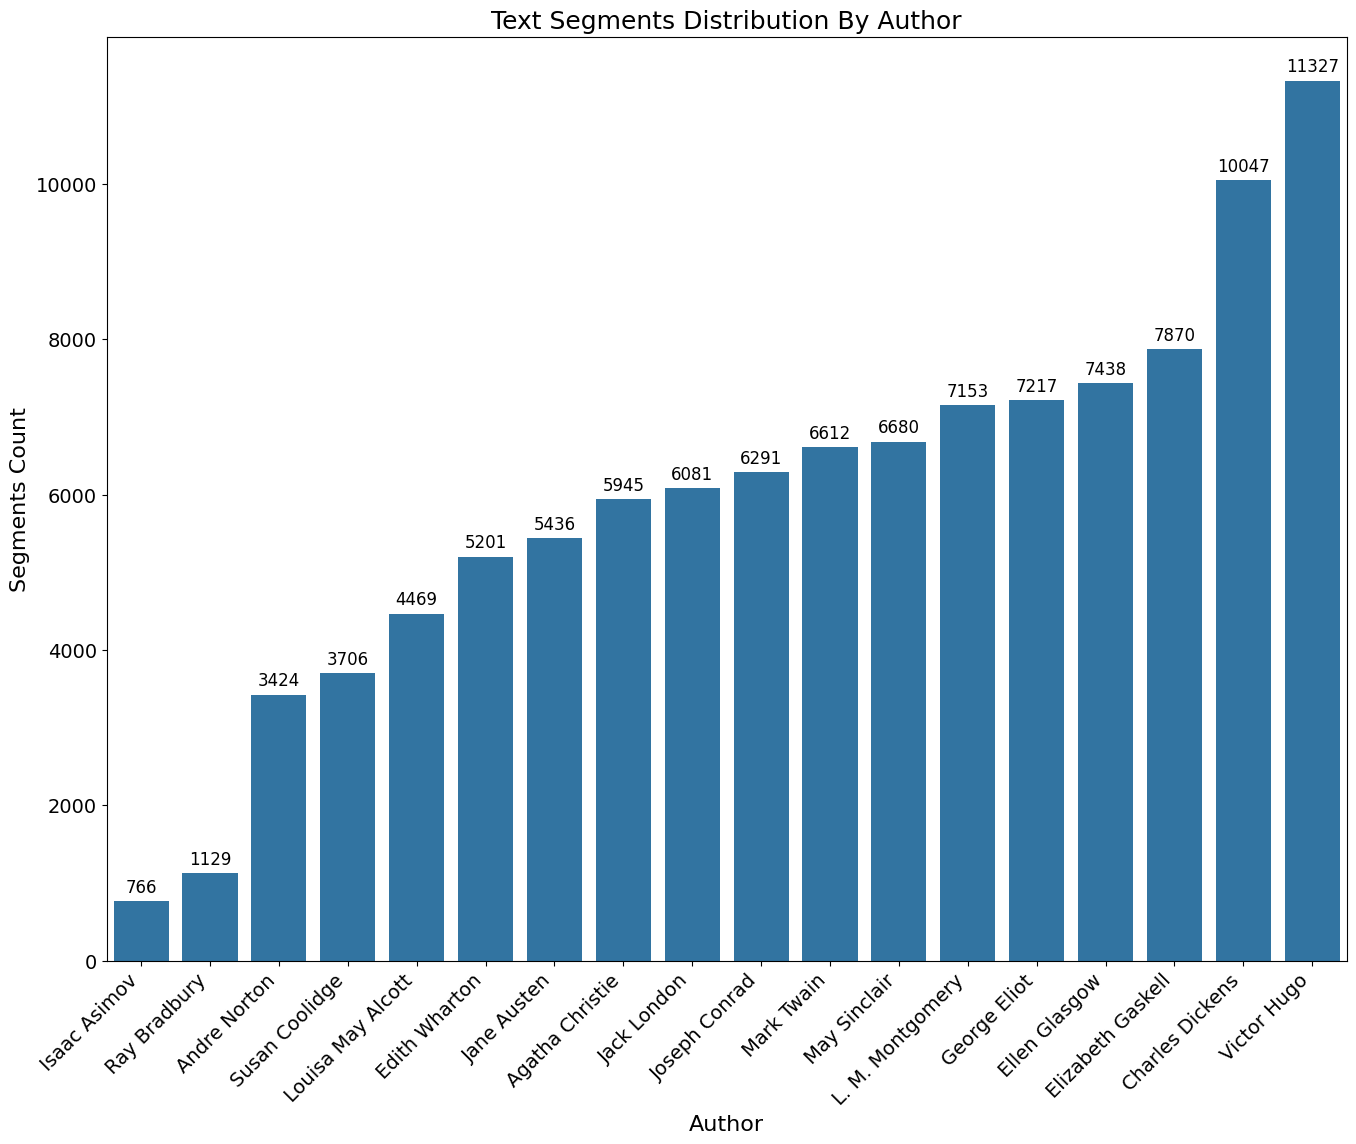

In [15]:
plt.figure(figsize=(16, 12))
ax = sns.barplot(x='Author', y='SegmentCount', data=authors)

plt.title('Text Segments Distribution By Author', fontsize=18) 
plt.xlabel('Author', fontsize=16)  
plt.ylabel('Segments Count', fontsize=16)  

plt.xticks(rotation=45, ha='right', fontsize=14)  
plt.yticks(fontsize=14)  

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center',  
                va='center',  
                xytext=(0, 10),  
                textcoords='offset points',
                fontsize=12)

plt.savefig(f'{plots_dir}SegmentsDistribution.pdf', bbox_inches='tight')
plt.show()

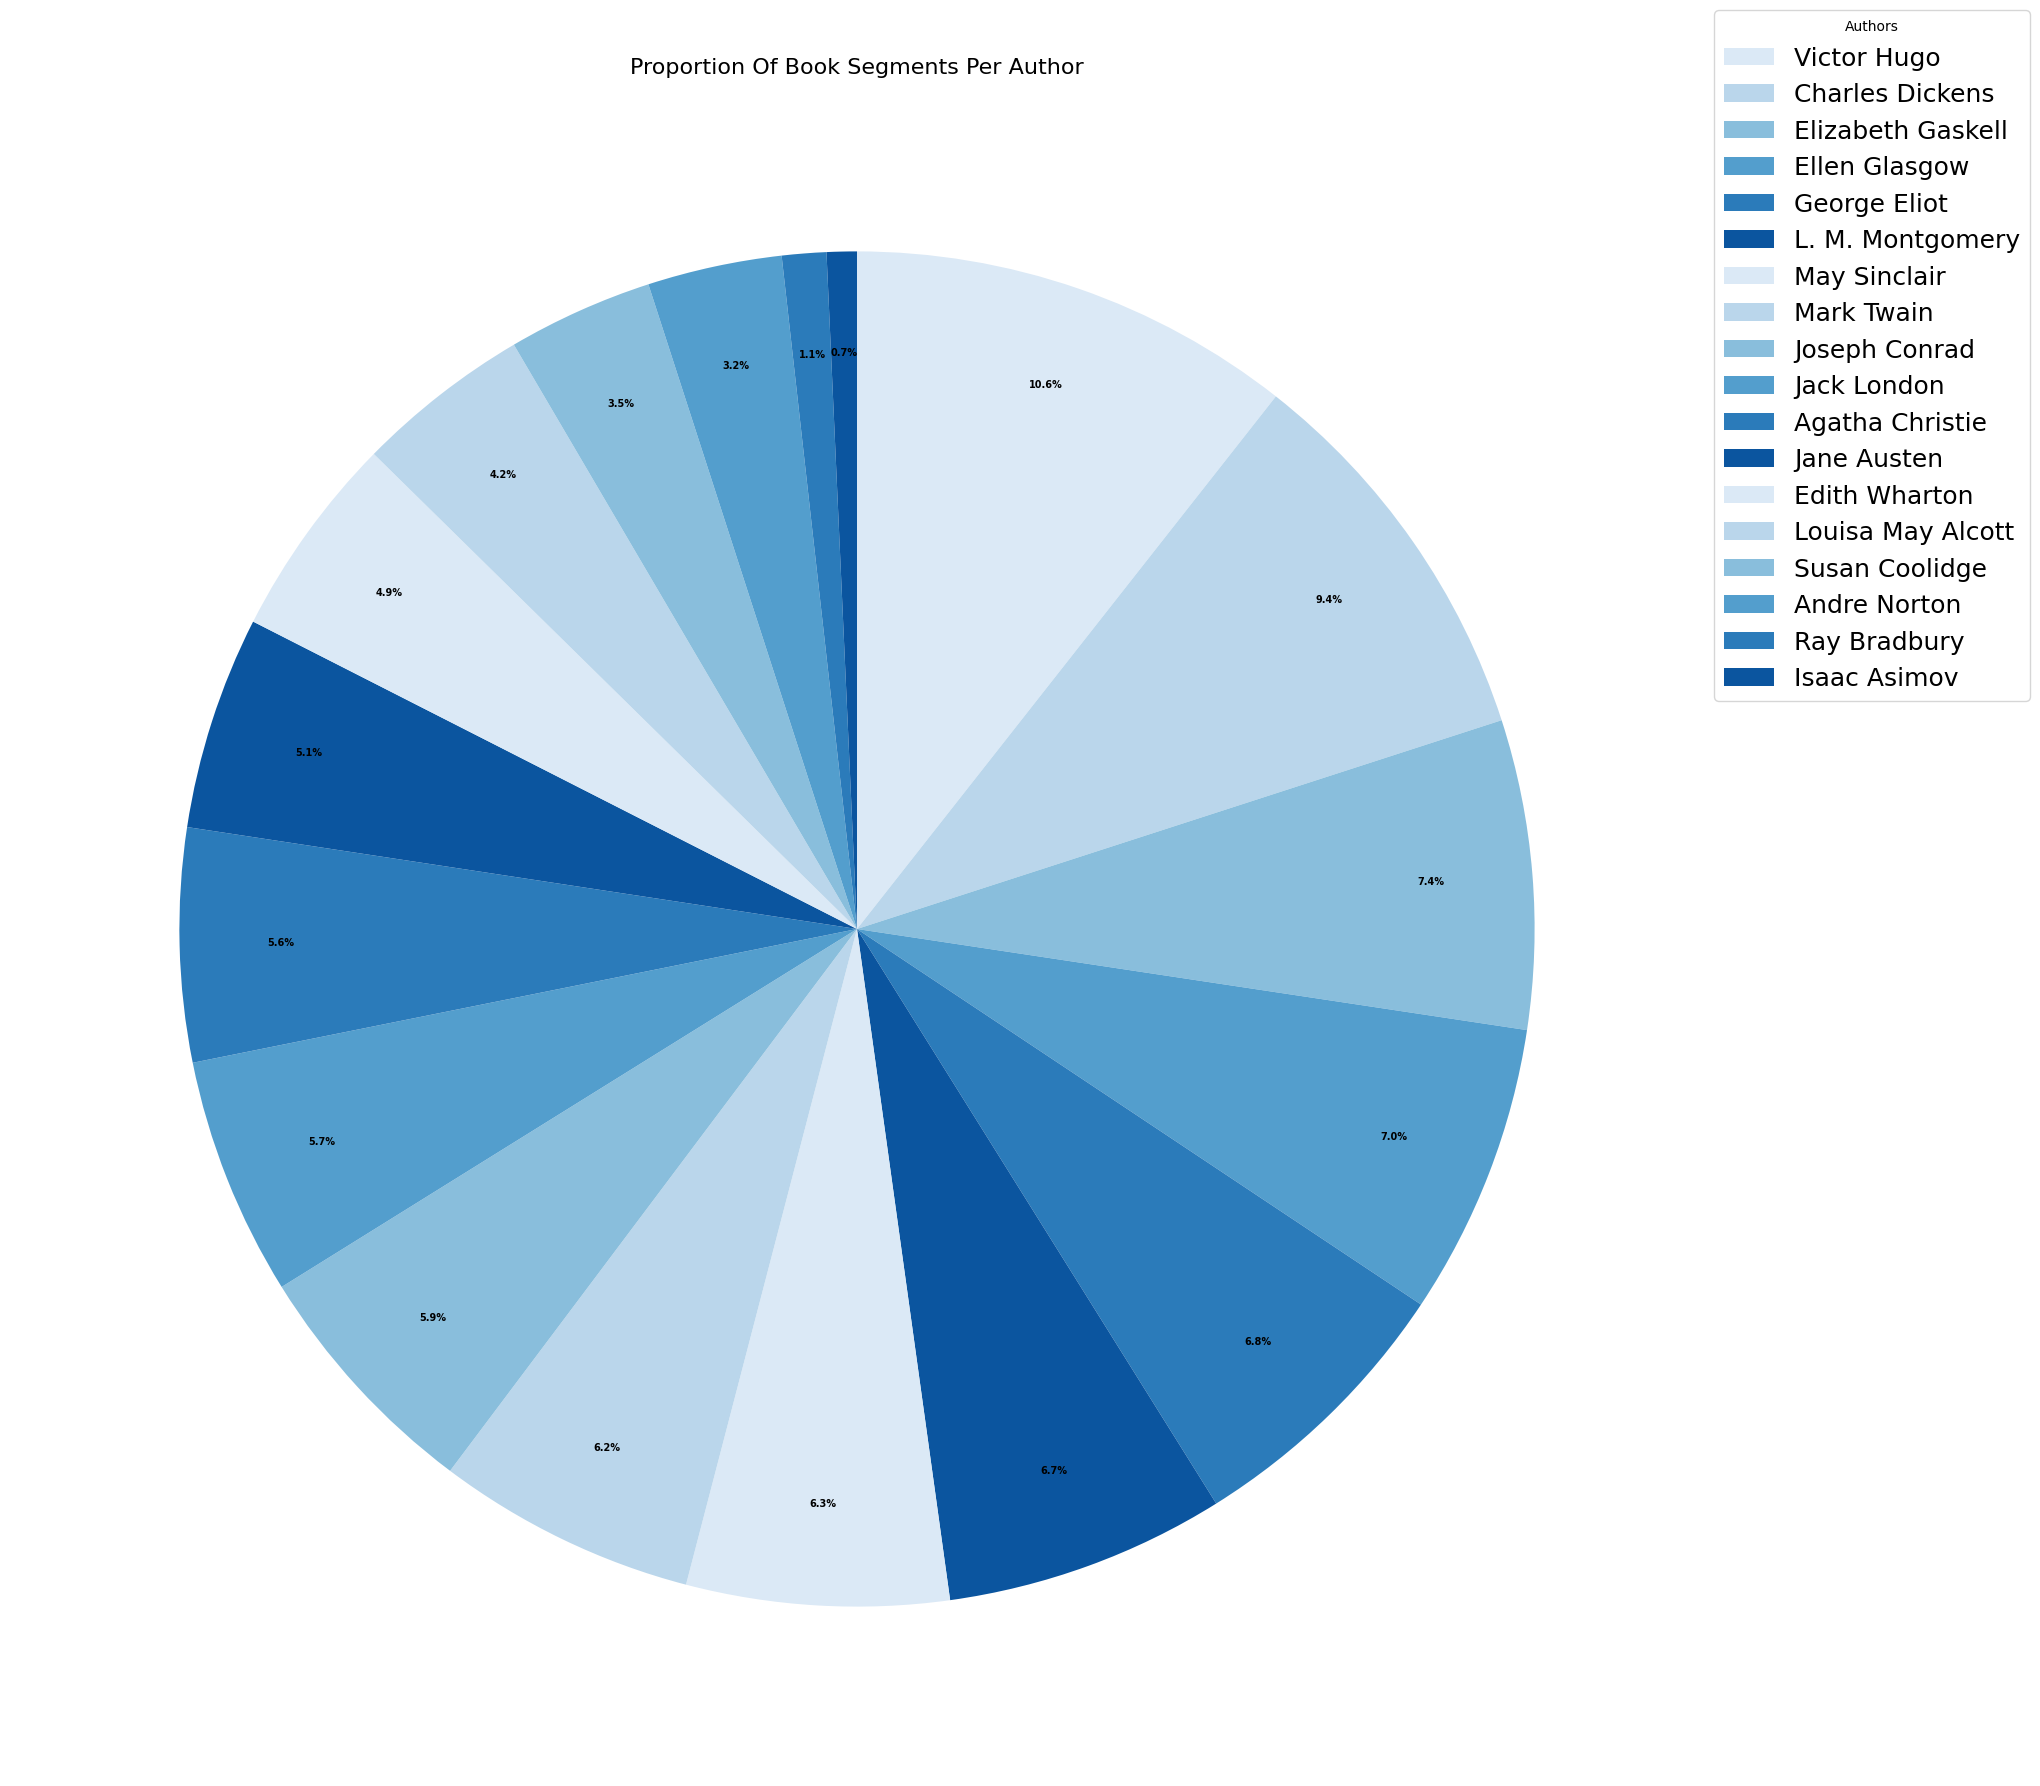

In [16]:
author_counts = df['Author'].value_counts()
colors = sns.color_palette("Blues")
explode = [0.1 if count < 5 else 0 for count in author_counts]  
plt.figure(figsize=(22, 22))
author_counts.plot(
    kind='pie',
    autopct='%1.1f%%', 
    colors=colors,  
    startangle=90,
    counterclock=False,
    explode=explode,  
    pctdistance=0.85,
    labels=None,
    textprops={'fontsize': 7, 'color': 'black', 'weight': 'bold'}
)
plt.title('Proportion Of Book Segments Per Author', fontsize=16)
plt.ylabel('') 
plt.legend(
    title='Authors',
    labels=author_counts.index,
    loc='upper right',
    bbox_to_anchor=(1.2, 1.05),
    fontsize=18  
)
plt.savefig(f'{plots_dir}Proportion.pdf', bbox_inches='tight')
plt.show()

In [17]:
author_counts = df['Author'].value_counts()

In [18]:
print(author_counts)

Author
Victor Hugo          11327
Charles Dickens      10047
Elizabeth Gaskell     7870
Ellen Glasgow         7438
George Eliot          7217
L. M. Montgomery      7153
May Sinclair          6680
Mark Twain            6612
Joseph Conrad         6291
Jack London           6081
Agatha Christie       5945
Jane Austen           5436
Edith Wharton         5201
Louisa May Alcott     4469
Susan Coolidge        3706
Andre Norton          3424
Ray Bradbury          1129
Isaac Asimov           766
Name: count, dtype: int64


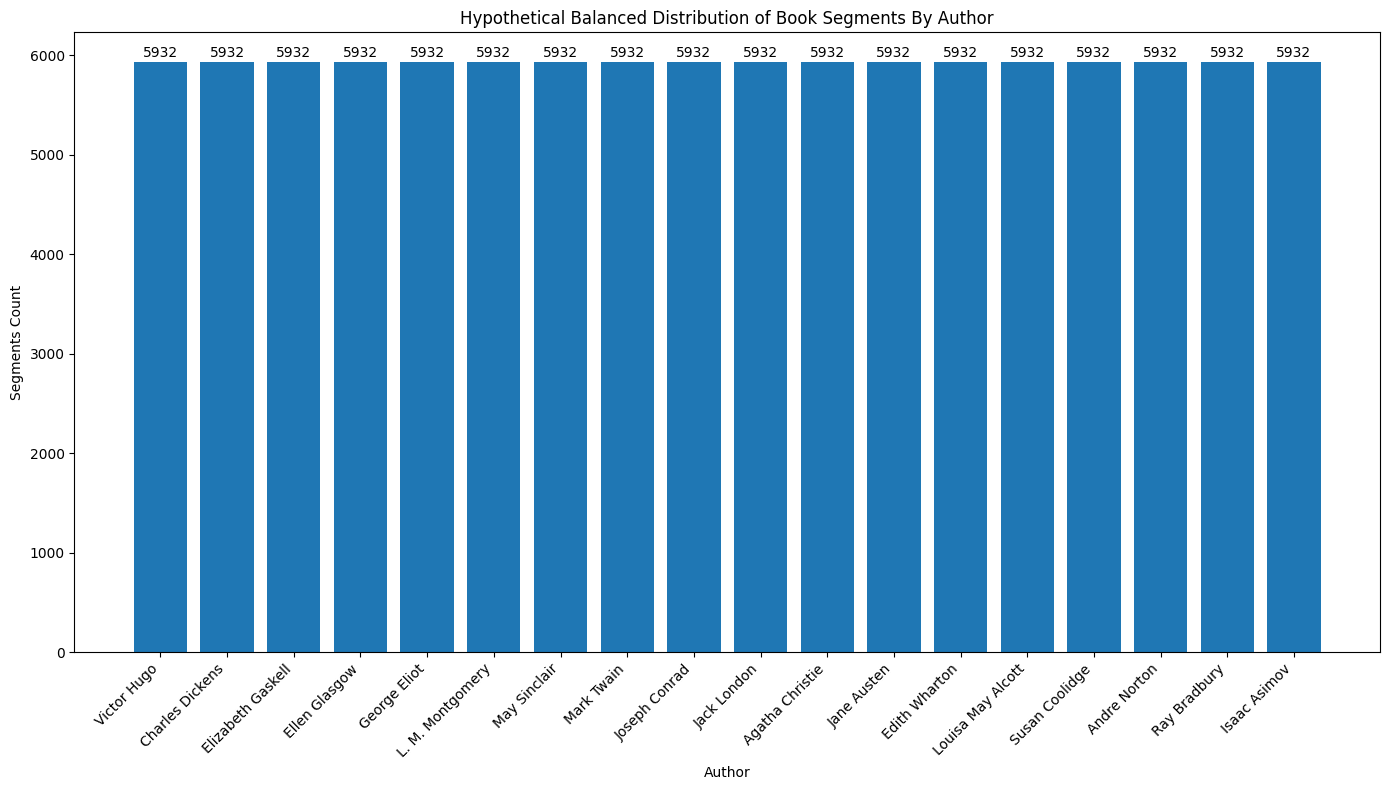

In [19]:
average_count = int(author_counts.mean())

balanced_counts = pd.Series(average_count, index=author_counts.index)


fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(balanced_counts.index, balanced_counts.values)

plt.title('Hypothetical Balanced Distribution of Book Segments By Author')
plt.xlabel('Author')
plt.ylabel('Segments Count')
plt.xticks(rotation=45, ha="right")  

for i in range(len(balanced_counts)):
    ax.text(i, average_count + 20, str(average_count), ha='center', va='bottom')

plt.tight_layout()
plt.savefig(f'{plots_dir}Average.pdf', bbox_inches='tight')
plt.show()

In [20]:
average_count = int(author_counts.mean())

deviations = author_counts - average_count

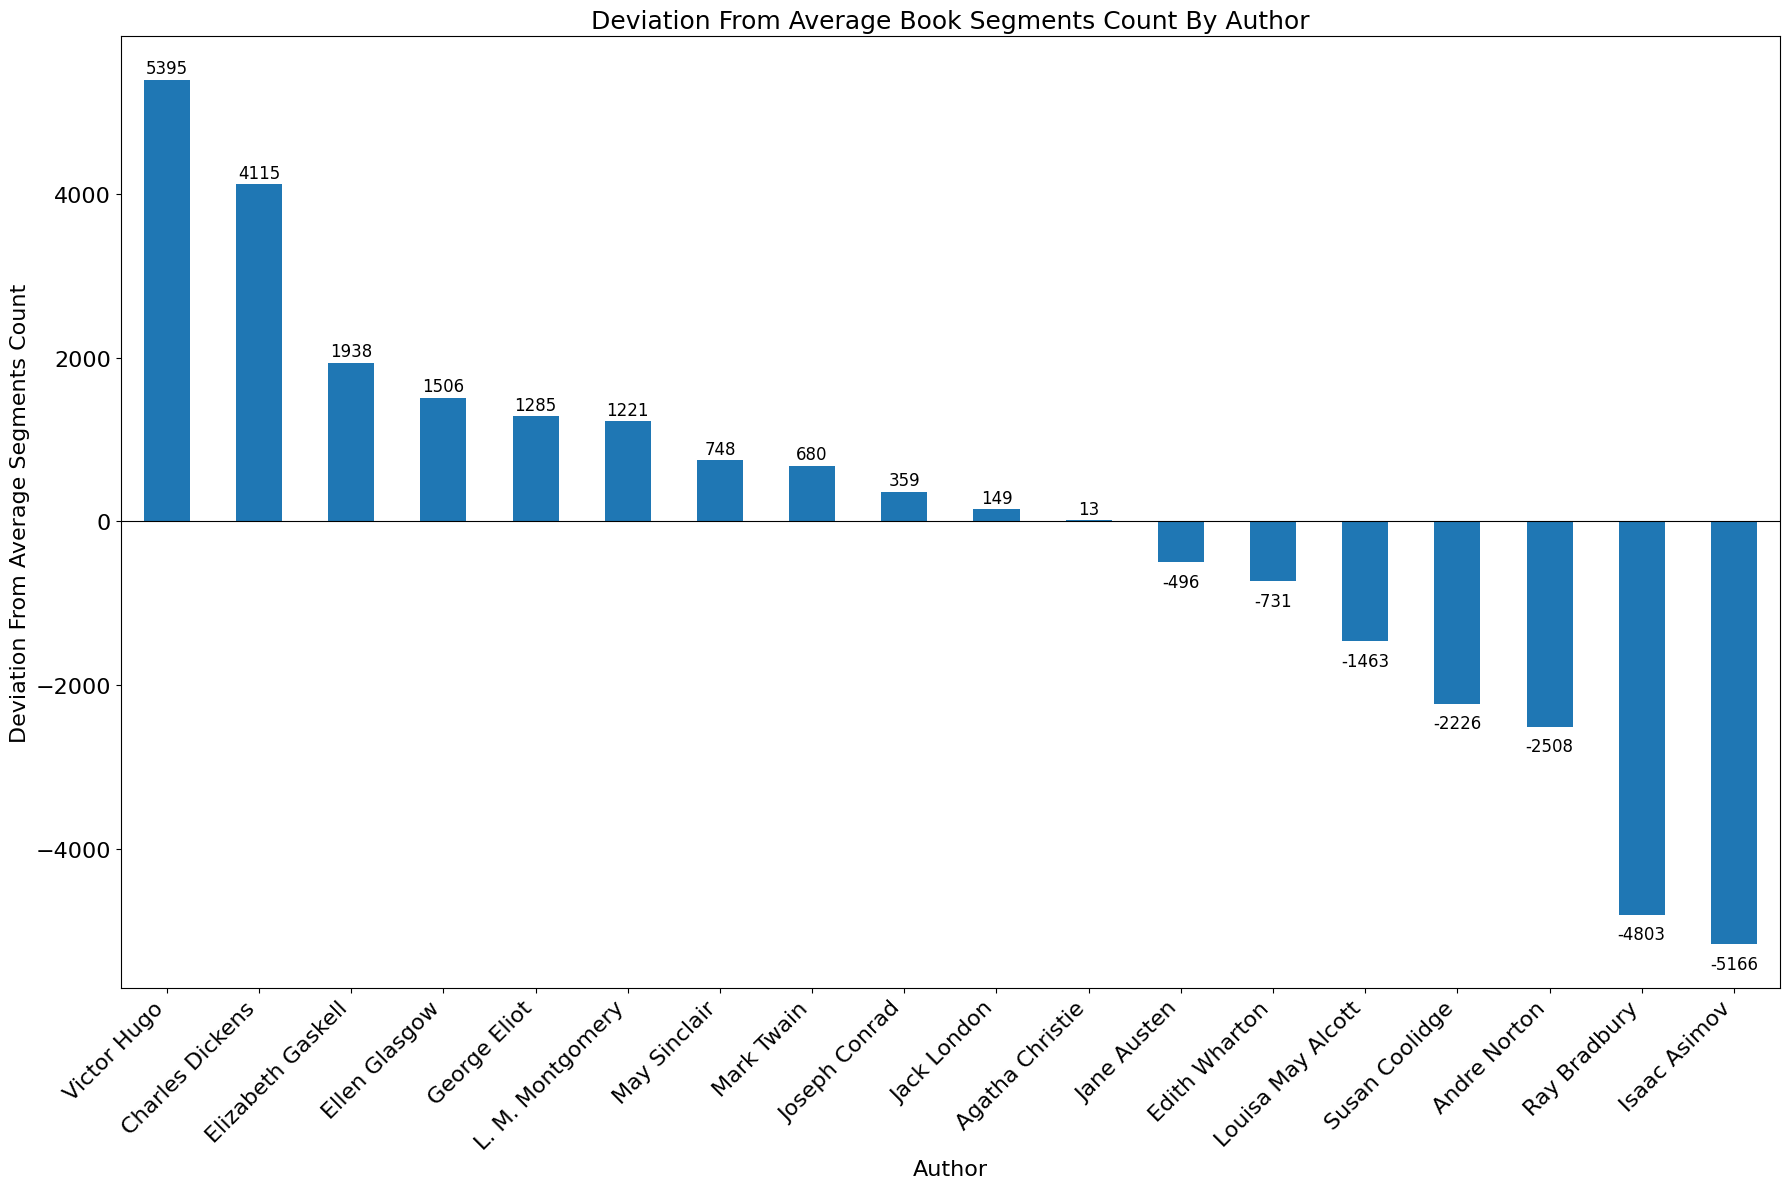

In [21]:
fig, ax = plt.subplots(figsize=(18, 12))

deviations.plot(kind='bar', ax=ax)


plt.title('Deviation From Average Book Segments Count By Author', fontsize=18)
plt.xlabel('Author', fontsize=16)
plt.ylabel('Deviation From Average Segments Count', fontsize=16)


plt.axhline(0, color='black', linewidth=0.8)


for i, v in enumerate(deviations):
    ax.text(i, v + (80 if v > 0 else -300), str(v), ha='center', fontsize=12)


ax.set_xticklabels(ax.get_xticklabels(), fontsize=16, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)


plt.tight_layout()
plt.savefig(f'{plots_dir}DeviationFromAverage.pdf', bbox_inches='tight')
plt.show()

In [22]:
df['Size'] = df['Text'].apply(count_words)

In [23]:
average_value = df['Size'].mean()
print(f"The average size of a Text Segment is: {average_value} tokens per a text segment on average.")

The average size of a Text Segment is: 289.0144580118361 tokens per a text segment on average.


In [24]:
df

Book  \
0       A Christmas Carol In Prose   
1       A Christmas Carol In Prose   
2       A Christmas Carol In Prose   
3       A Christmas Carol In Prose   
4       A Christmas Carol In Prose   
...                            ...   
106787                       Youth   
106788                       Youth   
106789                       Youth   
106790                       Youth   
106791                       Youth   

                                                     Text           Author  \
0       STAVE I: MARLEY'S GHOST MARLEY was dead: to be...  Charles Dickens   
1       Mind! I don't mean to say that I know, of my o...  Charles Dickens   
2       Scrooge knew he was dead? Of course he did. Ho...  Charles Dickens   
3       And even Scrooge was not so dreadfully cut up ...  Charles Dickens   
4       Scrooge never painted out Old Marley's name. T...  Charles Dickens   
...                                                   ...              ...   
106787  Imagine!" The Astronomer said, "Youth!" XIII T...     Isaac Asimov   
106788  All the remaining seventeen of the crew were d...     Isaac Asimov   
106789  The Merchant then said, "They've lined up to s...     Isaac Asimov   
106790  "Horrible-looking things, aren't they?" "Pleas...     Isaac Asimov   
106791  "That's a queer name for a monster. Makes me l...     Isaac Asimov   

        AuthorCode  AverageWordLength  AverageSentenceLength  \
0                2           3.776316              15.200000   
1                2           3.945513              20.800000   
2                2           4.017794              18.733333   
3                2           4.043478              21.466667   
4                2           3.945525              17.133333   
...            ...                ...                    ...   
106787           7           3.443820              11.866667   
106788           7           3.611702              12.533333   
106789           7           3.526316              11.400000   
106790           7           3.735632              11.600000   
106791           7           4.167464              13.933333   

        AverageSyllablePerWord  PunctuationCount  FunctionalWordsCount  \
0                     1.092105          0.039122              0.438596   
1                     1.176282          0.028056              0.458333   
2                     1.153025          0.027778              0.427046   
3                     1.136646          0.031190              0.397516   
4                     1.073930          0.037582              0.365759   
...                        ...               ...                   ...   
106787                0.932584          0.055707              0.404494   
106788                0.952128          0.055831              0.393617   
106789                0.964912          0.063114              0.403509   
106790                1.034483          0.063325              0.350575   
106791                1.200957          0.039729              0.377990   

        TypeTokenRatio  ...  Dihapax  YulesCharacteristicK  SimpsonsIndex  \
0             0.521930  ...       12            194.675285       0.980532   
1             0.567308  ...       15            137.861604       0.986214   
2             0.580071  ...       17            148.554350       0.985145   
3             0.593168  ...       16            152.771884       0.984723   
4             0.591440  ...        9            204.545110       0.979545   
...                ...  ...      ...                   ...            ...   
106787        0.561798  ...       16            186.213862       0.981379   
106788        0.574468  ...       19            185.038479       0.981496   
106789        0.608187  ...       14            189.801990       0.981020   
106790        0.637931  ...       12            190.249703       0.980975   
106791        0.688995  ...       19            130.720451       0.986928   

        BrunetsMeasureW  ShannonEntropy  FleschReadin

In [25]:
df.head()

Book  \
0  A Christmas Carol In Prose   
1  A Christmas Carol In Prose   
2  A Christmas Carol In Prose   
3  A Christmas Carol In Prose   
4  A Christmas Carol In Prose   

                                                Text           Author  \
0  STAVE I: MARLEY'S GHOST MARLEY was dead: to be...  Charles Dickens   
1  Mind! I don't mean to say that I know, of my o...  Charles Dickens   
2  Scrooge knew he was dead? Of course he did. Ho...  Charles Dickens   
3  And even Scrooge was not so dreadfully cut up ...  Charles Dickens   
4  Scrooge never painted out Old Marley's name. T...  Charles Dickens   

   AuthorCode  AverageWordLength  AverageSentenceLength  \
0           2           3.776316              15.200000   
1           2           3.945513              20.800000   
2           2           4.017794              18.733333   
3           2           4.043478              21.466667   
4           2           3.945525              17.133333   

   AverageSyllablePerWord  PunctuationCount  FunctionalWordsCount  \
0                1.092105          0.039122              0.438596   
1                1.176282          0.028056              0.458333   
2                1.153025          0.027778              0.427046   
3                1.136646          0.031190              0.397516   
4                1.073930          0.037582              0.365759   

   TypeTokenRatio  ...  Dihapax  YulesCharacteristicK  SimpsonsIndex  \
0        0.521930  ...       12            194.675285       0.980532   
1        0.567308  ...       15            137.861604       0.986214   
2        0.580071  ...       17            148.554350       0.985145   
3        0.593168  ...       16            152.771884       0.984723   
4        0.591440  ...        9            204.545110       0.979545   

   BrunetsMeasureW  ShannonEntropy  FleschReadingEase  \
0       100.216855        6.339693              83.25   
1       128.086451        6.920491              69.01   
2       117.006517        6.799573              72.16   
3       130.472244        6.976138              68.81   
4       108.306875        6.591092              81.53   

   FleschKincaidGradeLevel  DaleChallReadability  GunningFog  Size  
0                      5.0                  7.58        7.91   188  
1                      8.4                  8.01       10.49   267  
2                      7.2                  7.52        8.57   240  
3                      8.5                  8.40        9.50   270  
4                      5.6                  8.50        6.99   211  

[5 rows x 23 columns]

In [26]:
df.tail()

Book                                               Text  \
106787  Youth  Imagine!" The Astronomer said, "Youth!" XIII T...   
106788  Youth  All the remaining seventeen of the crew were d...   
106789  Youth  The Merchant then said, "They've lined up to s...   
106790  Youth  "Horrible-looking things, aren't they?" "Pleas...   
106791  Youth  "That's a queer name for a monster. Makes me l...   

              Author  AuthorCode  AverageWordLength  AverageSentenceLength  \
106787  Isaac Asimov           7           3.443820              11.866667   
106788  Isaac Asimov           7           3.611702              12.533333   
106789  Isaac Asimov           7           3.526316              11.400000   
106790  Isaac Asimov           7           3.735632              11.600000   
106791  Isaac Asimov           7           4.167464              13.933333   

        AverageSyllablePerWord  PunctuationCount  FunctionalWordsCount  \
106787                0.932584          0.055707              0.404494   
106788                0.952128          0.055831              0.393617   
106789                0.964912          0.063114              0.403509   
106790                1.034483          0.063325              0.350575   
106791                1.200957          0.039729              0.377990   

        TypeTokenRatio  ...  Dihapax  YulesCharacteristicK  SimpsonsIndex  \
106787        0.561798  ...       16            186.213862       0.981379   
106788        0.574468  ...       19            185.038479       0.981496   
106789        0.608187  ...       14            189.801990       0.981020   
106790        0.637931  ...       12            190.249703       0.980975   
106791        0.688995  ...       19            130.720451       0.986928   

        BrunetsMeasureW  ShannonEntropy  FleschReadingEase  \
106787        80.615769        6.229214              94.66   
106788        84.025086        6.325038              86.60   
106789        76.924800        6.296143              87.82   
106790        77.402270        6.353646              78.65   
106791        88.901264        6.829536              67.65   

        FleschKincaidGradeLevel  DaleChallReadability  GunningFog  Size  
106787                      2.7                  6.23        5.08   137  
106788                      3.7                  6.69        6.01   142  
106789                      3.2                  6.73        6.76   125  
106790                      4.7                  7.90        8.32   125  
106791                      6.8                  9.44        9.08   170  

[5 rows x 23 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106792 entries, 0 to 106791
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Book                     106792 non-null  object 
 1   Text                     106792 non-null  object 
 2   Author                   106792 non-null  object 
 3   AuthorCode               106792 non-null  int64  
 4   AverageWordLength        106792 non-null  float64
 5   AverageSentenceLength    106792 non-null  float64
 6   AverageSyllablePerWord   106792 non-null  float64
 7   PunctuationCount         106792 non-null  float64
 8   FunctionalWordsCount     106792 non-null  float64
 9   TypeTokenRatio           106792 non-null  float64
 10  HonoreMeasureR           106792 non-null  float64
 11  Hapax                    106792 non-null  float64
 12  SichelesMeasureS         106792 non-null  float64
 13  Dihapax                  106792 non-null  int64  
 14  Yule

In [28]:
df.describe()

AuthorCode  AverageWordLength  AverageSentenceLength  \
count  106792.000000      106792.000000          106792.000000   
mean        8.404319           3.709325              23.306011   
std         5.324243           0.318790               9.427722   
min         0.000000           1.000000               1.000000   
25%         4.000000           3.491071              16.533333   
50%         8.000000           3.719870              21.600000   
75%        13.000000           3.937173              28.533333   
max        17.000000           5.210396             141.066667   

       AverageSyllablePerWord  PunctuationCount  FunctionalWordsCount  \
count           106792.000000     106792.000000         106792.000000   
mean                 1.069741          0.034257              0.436450   
std                  0.112235          0.015260              0.046585   
min                  0.000000          0.009521              0.000000   
25%                  0.995413          0.025082              0.411429   
50%                  1.073557          0.030598              0.440217   
75%                  1.147651          0.038991              0.466667   
max                  1.679012          0.517241              0.600000   

       TypeTokenRatio  HonoreMeasureR          Hapax  SichelesMeasureS  \
count   106792.000000   106792.000000  106792.000000     106792.000000   
mean         0.530836      952.127269       0.389822          0.350305   
std          0.054224       81.332658       0.057432          0.106457   
min          0.066667      270.805020       0.000000          0.000000   
25%          0.494565      900.525338       0.350829          0.277778   
50%          0.530806      951.666571       0.389034          0.338235   
75%          0.567273     1003.996016       0.427807          0.409836   
max          0.801418     1836.250380       0.730496          3.015385   

             Dihapax  YulesCharacteristicK  SimpsonsIndex  BrunetsMeasureW  \
count  106792.000000         106792.000000  106792.000000    106792.000000   
mean       22.478004            177.100364       0.982290       141.504520   
std         8.469025            144.552196       0.014455        49.139746   
min         0.000000             81.991111       0.000000        14.181370   
25%        16.000000            146.352659       0.981010       106.019567   
50%        21.000000            165.166919       0.983483       133.759950   
75%        28.000000            189.900549       0.985365       170.059264   
max        98.000000          10000.000000       0.991801       664.977398   

       ShannonEntropy  FleschReadingEase  FleschKincaidGradeLevel  \
count   106792.000000      106792.000000            106792.000000   
mean         6.757833          78.484733                 6.637536   
std          0.403746          11.150986                 3.067650   
min          0.000000         -17.780000               -15.700000   
25%          6.545703          71.680000                 4.500000   
50%          6.792465          79.500000                 6.200000   
75%          7.021693          86.100000                 8.300000   
max          7.958186         206.840000                41.700000   

       DaleChallReadability     GunningFog           Size  
count         106792.000000  106792.000000  106792.000000  
mean               7.649313       8.869447     289.014458  
std                0.935096       3.110948     124.508314  
min                0.000000       0.000000      15.000000  
25%                7.060000       6.650000     199.000000  
50%                7.610000       8.400000     267.000000  
75%                8.190000      10.590000     358.000000  
max               24.840000      44.350000    1675.000000

In [29]:
df.columns

Index(['Book', 'Text', 'Author', 'AuthorCode', 'AverageWordLength',
       'AverageSentenceLength', 'AverageSyllablePerWord', 'PunctuationCount',
       'FunctionalWordsCount', 'TypeTokenRatio', 'HonoreMeasureR', 'Hapax',
       'SichelesMeasureS', 'Dihapax', 'YulesCharacteristicK', 'SimpsonsIndex',
       'BrunetsMeasureW', 'ShannonEntropy', 'FleschReadingEase',
       'FleschKincaidGradeLevel', 'DaleChallReadability', 'GunningFog',
       'Size'],
      dtype='object')

In [30]:
df.isnull().sum()

Book                       0
Text                       0
Author                     0
AuthorCode                 0
AverageWordLength          0
AverageSentenceLength      0
AverageSyllablePerWord     0
PunctuationCount           0
FunctionalWordsCount       0
TypeTokenRatio             0
HonoreMeasureR             0
Hapax                      0
SichelesMeasureS           0
Dihapax                    0
YulesCharacteristicK       0
SimpsonsIndex              0
BrunetsMeasureW            0
ShannonEntropy             0
FleschReadingEase          0
FleschKincaidGradeLevel    0
DaleChallReadability       0
GunningFog                 0
Size                       0
dtype: int64

## Corelation Analysis

In [31]:
df.drop(['Book', 'Text', 'Author', 'AuthorCode', 'Size'], axis=1, inplace=True)

In [32]:
df.corr()

AverageWordLength  AverageSentenceLength  \
AverageWordLength                 1.000000               0.314124   
AverageSentenceLength             0.314124               1.000000   
AverageSyllablePerWord            0.933529               0.380197   
PunctuationCount                 -0.601617              -0.456306   
FunctionalWordsCount              0.146107               0.271730   
TypeTokenRatio                    0.137221              -0.679282   
HonoreMeasureR                    0.590705               0.210308   
Hapax                             0.279130              -0.503301   
SichelesMeasureS                 -0.321923              -0.041888   
Dihapax                           0.205357               0.822540   
YulesCharacteristicK             -0.229900              -0.183607   
SimpsonsIndex                     0.229900               0.183607   
BrunetsMeasureW                   0.300455               0.998701   
ShannonEntropy                    0.476629               0.800543   
FleschReadingEase                -0.767425              -0.648619   
FleschKincaidGradeLevel           0.655870               0.799438   
DaleChallReadability              0.624562               0.329664   
GunningFog                        0.632131               0.805989   

                         AverageSyllablePerWord  PunctuationCount  \
AverageWordLength                      0.933529         -0.601617   
AverageSentenceLength                  0.380197         -0.456306   
AverageSyllablePerWord                 1.000000         -0.693460   
PunctuationCount                      -0.693460          1.000000   
FunctionalWordsCount                   0.338277         -0.557569   
TypeTokenRatio                         0.037375          0.095726   
HonoreMeasureR                         0.534110         -0.442673   
Hapax                                  0.172629          0.002810   
SichelesMeasureS                      -0.275881          0.140217   
Dihapax                                0.271867         -0.386766   
YulesCharacteristicK                  -0.269333          0.563880   
SimpsonsIndex                          0.269333         -0.563880   
BrunetsMeasureW                        0.371145         -0.460485   
ShannonEntropy                         0.539703         -0.693969   
FleschReadingEase                     -0.810116          0.495923   
FleschKincaidGradeLevel                0.701174         -0.511284   
DaleChallReadability                   0.536880         -0.245010   
GunningFog                             0.684771         -0.509806   

                         FunctionalWordsCount  TypeTokenRatio  HonoreMeasureR  \
AverageWordLength                    0.146107        0.137221        0.590705   
AverageSentenceLength                0.271730       -0.679282        0.210308   
AverageSyllablePerWord               0.338277        0.037375        0.534110   
PunctuationCount                    -0.557569        0.095726       -0.442673   
FunctionalWordsCount                 1.000000       -0.231181       -0.009820   
TypeTokenRatio                      -0.231181        1.000000        0.497339   
HonoreMeasureR                      -0.009820        0.497339        1.000000   
Hapax                               -0.242660        0.936187        0.708453   
SichelesMeasureS                     0.094275       -0.293168       -0.649433   
Dihapax                              0.268410       -0.594510        0.005346   
YulesCharacteristicK                -0.329712       -0.079747       -0.264449   
SimpsonsIndex                        0.329712        0.079747        0.264449   
BrunetsMeasureW                      0.282495       -0.705676        0.185075   
ShannonEntropy                       0.374243       -0.296019        0.508212   
FleschReadingEase                   -0.151753        0.249283       -0.431390   
FleschKincaidGradeLevel              0.262551       -0.389210        0.397458   
DaleChallReadability    

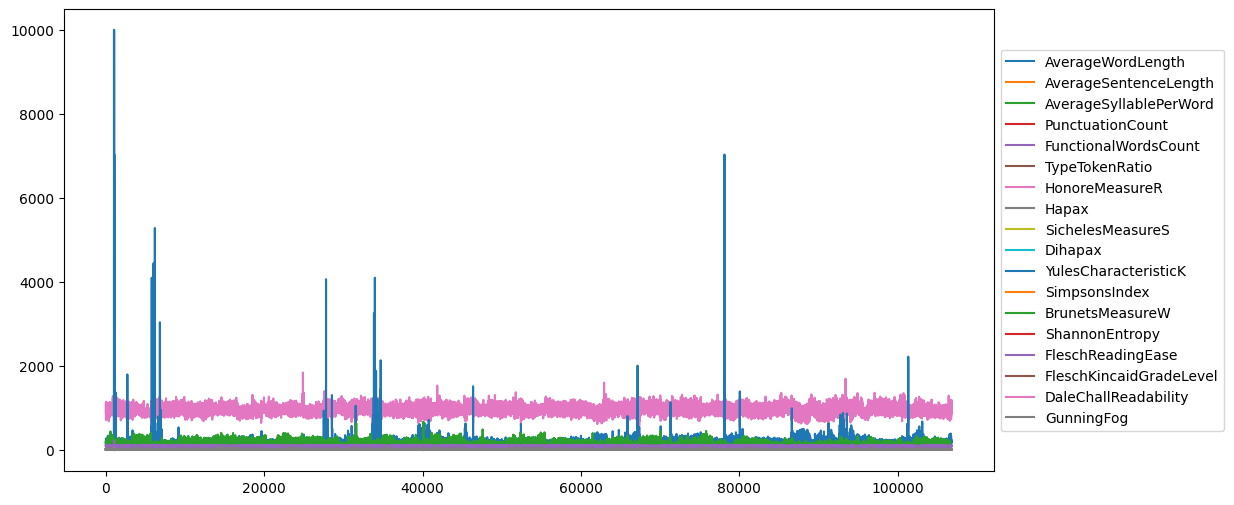

In [33]:
ax = df.plot(kind='line', figsize=(12, 6)) 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [34]:
corr_matrix = df.corr()

In [35]:
threshold = 0.7

In [36]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [37]:
filtered_corr_matrix = corr_matrix.mask(mask)

In [38]:
high_corr = filtered_corr_matrix.stack().reset_index()

In [39]:
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

In [40]:
high_corr = high_corr[high_corr['Correlation'].abs() > threshold]

In [41]:
print(high_corr)

                   Feature 1                Feature 2  Correlation
1     AverageSyllablePerWord        AverageWordLength     0.933529
26                     Hapax           TypeTokenRatio     0.936187
27                     Hapax           HonoreMeasureR     0.708453
37                   Dihapax    AverageSentenceLength     0.822540
65             SimpsonsIndex     YulesCharacteristicK    -1.000000
67           BrunetsMeasureW    AverageSentenceLength     0.998701
71           BrunetsMeasureW           TypeTokenRatio    -0.705676
75           BrunetsMeasureW                  Dihapax     0.825054
79            ShannonEntropy    AverageSentenceLength     0.800543
87            ShannonEntropy                  Dihapax     0.707017
90            ShannonEntropy          BrunetsMeasureW     0.800389
91         FleschReadingEase        AverageWordLength    -0.767425
93         FleschReadingEase   AverageSyllablePerWord    -0.810116
106  FleschKincaidGradeLevel    AverageSentenceLength     0.79

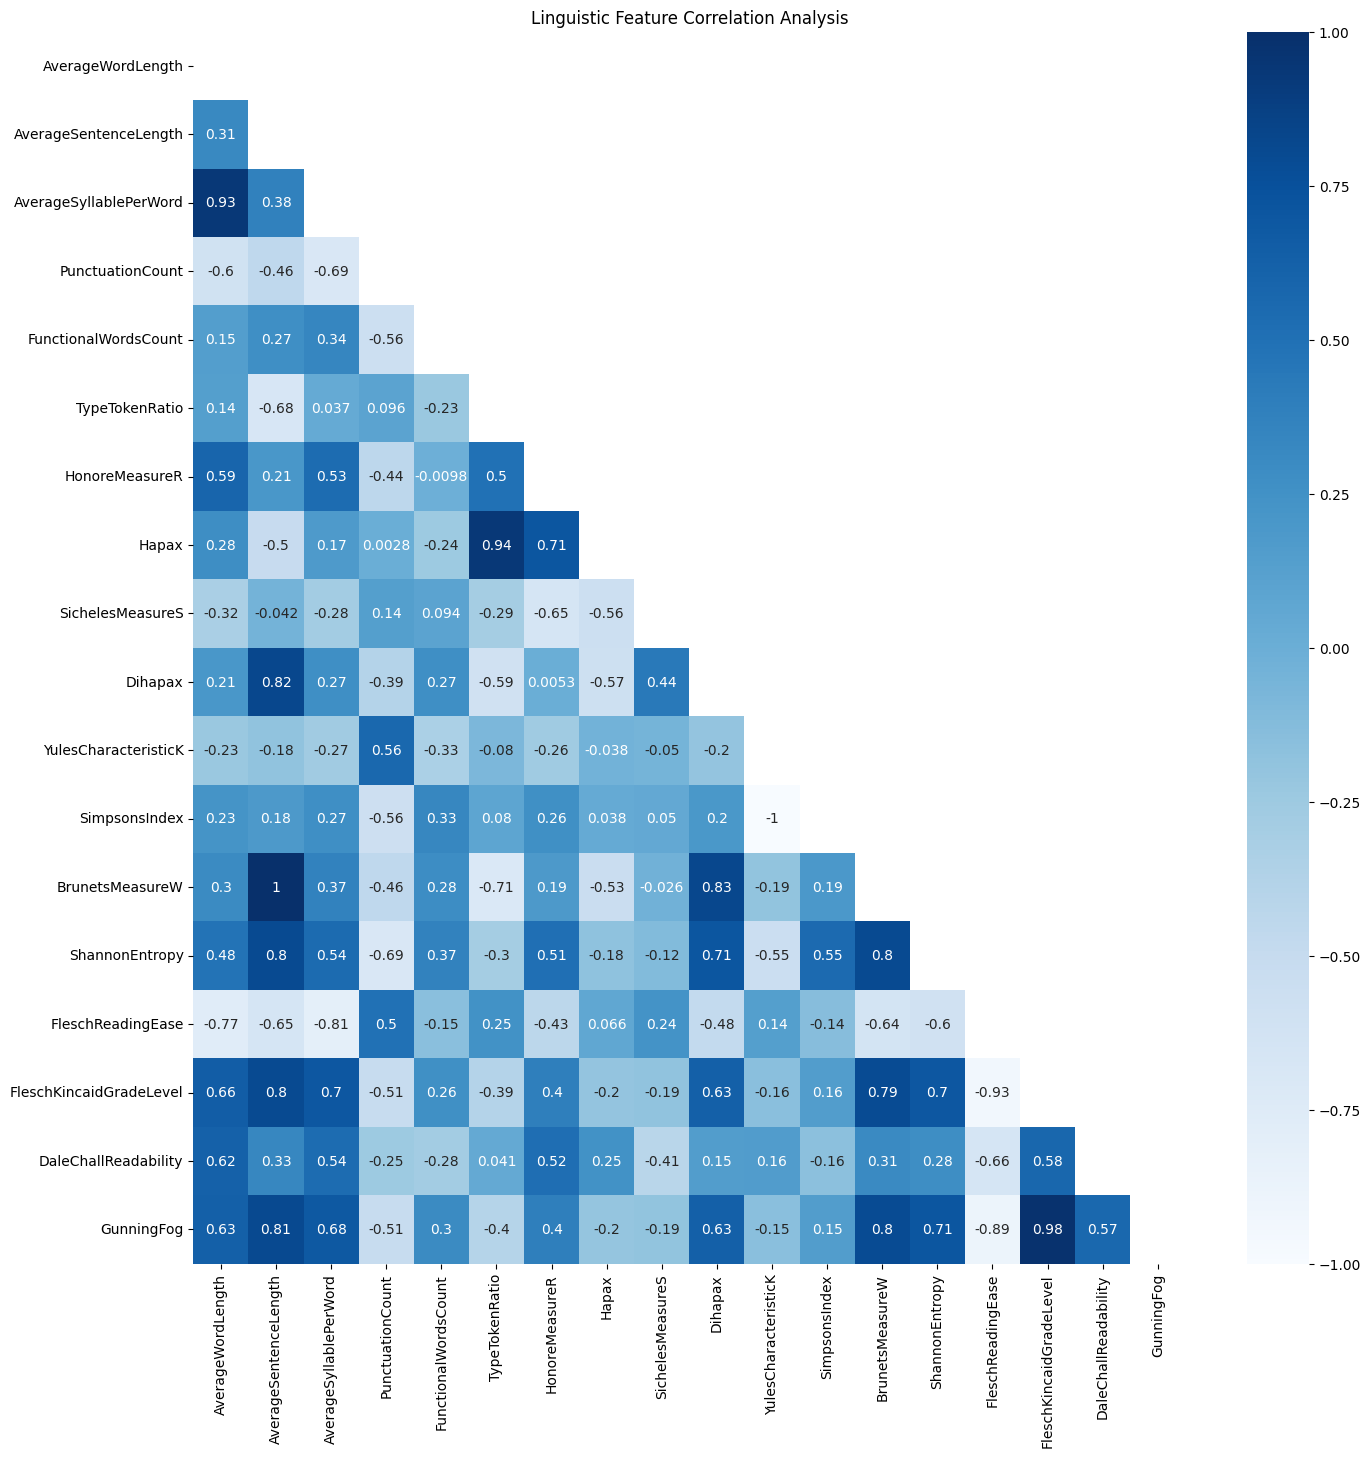

In [42]:
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Linguistic Feature Correlation Analysis')
plt.savefig(f'{plots_dir}LinguisticFeatureCorrelationAnalysis.pdf', bbox_inches='tight')
plt.show()

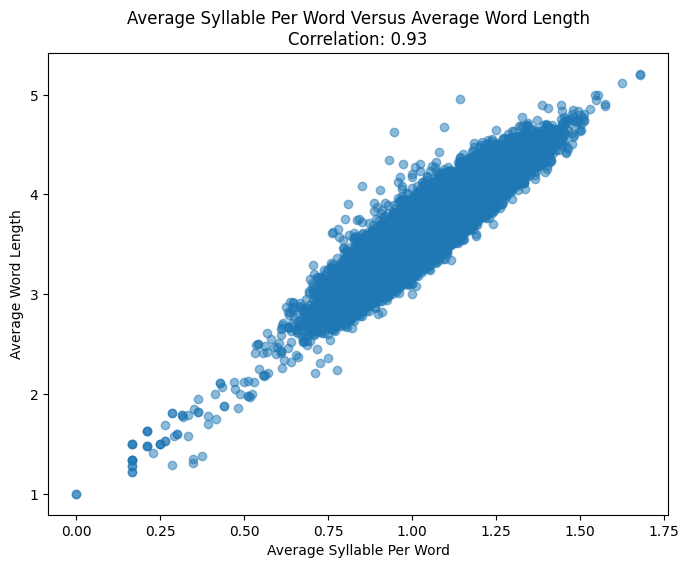

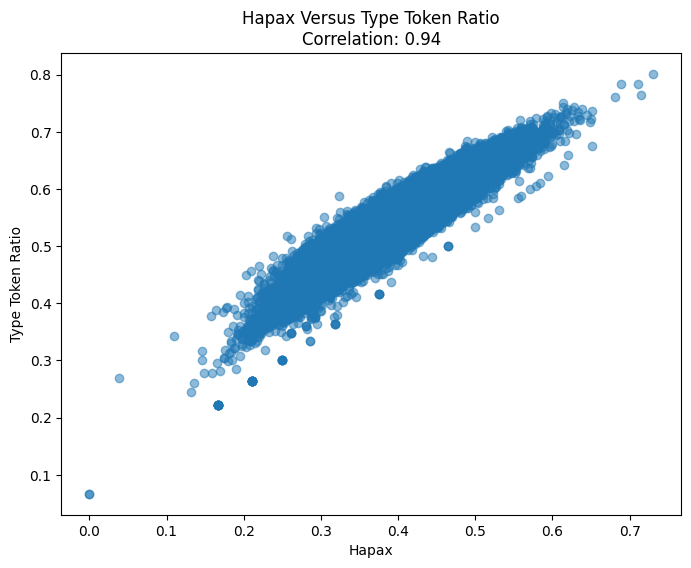

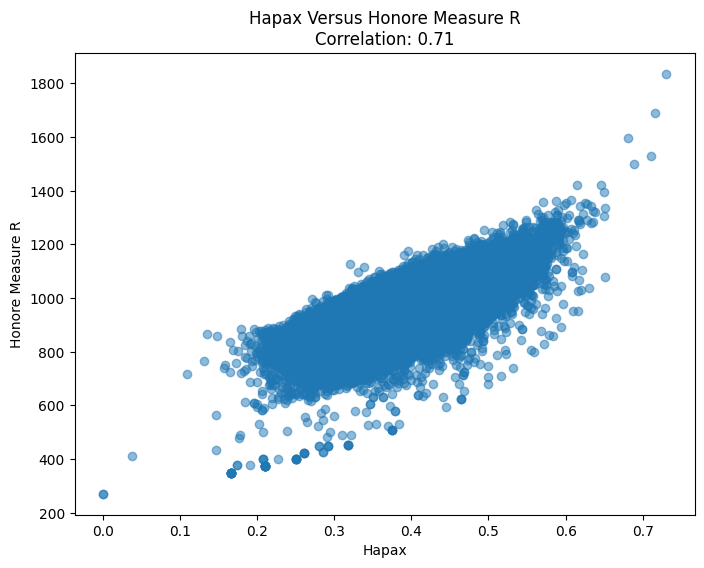

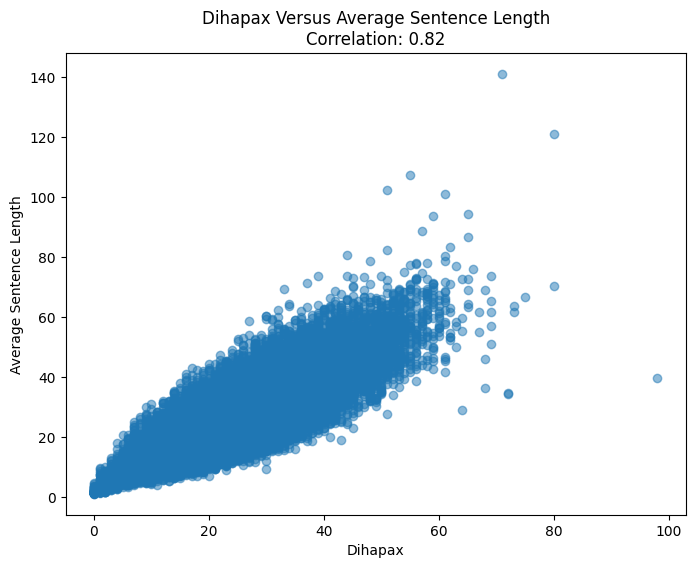

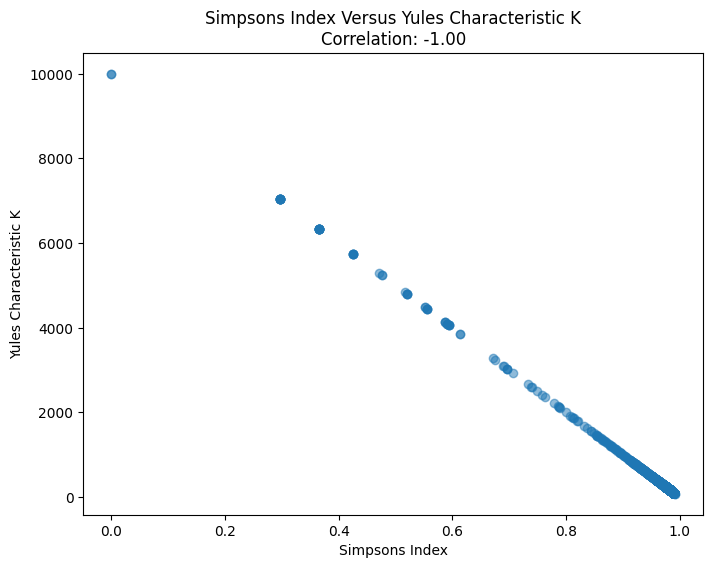

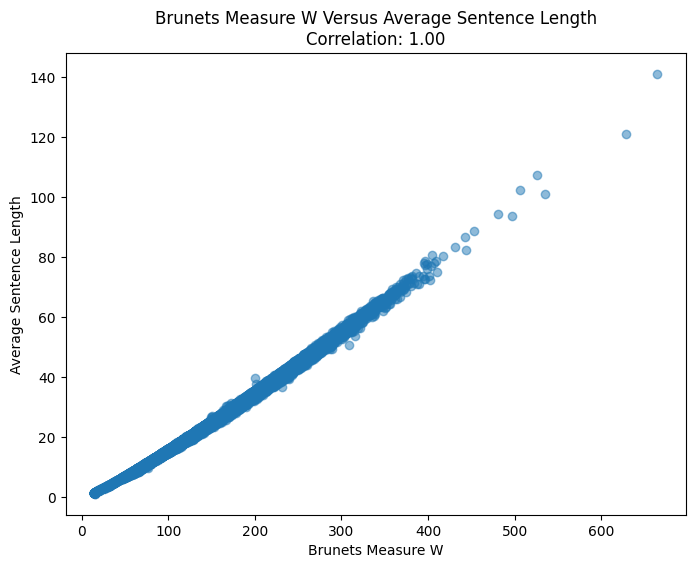

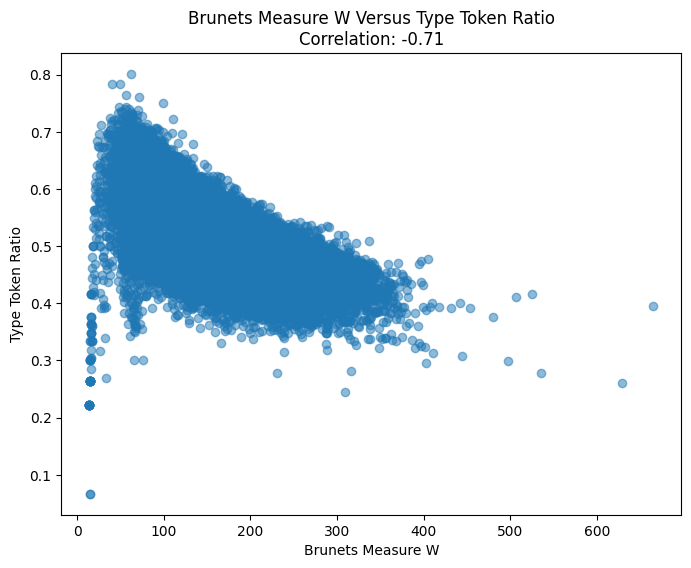

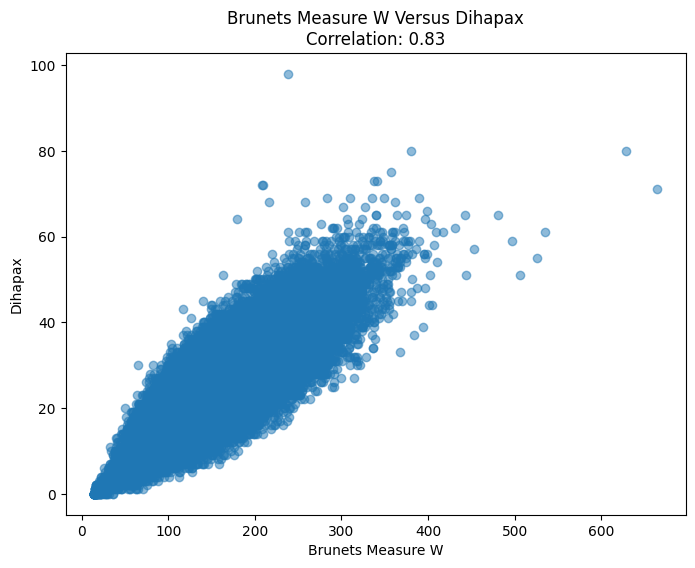

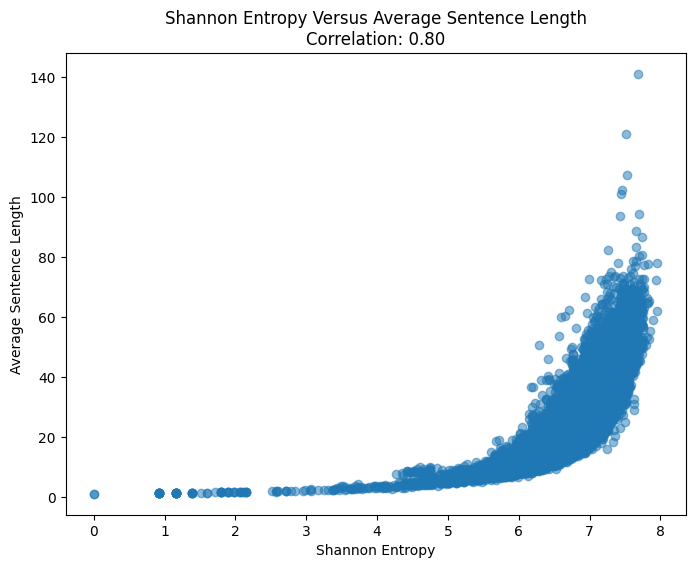

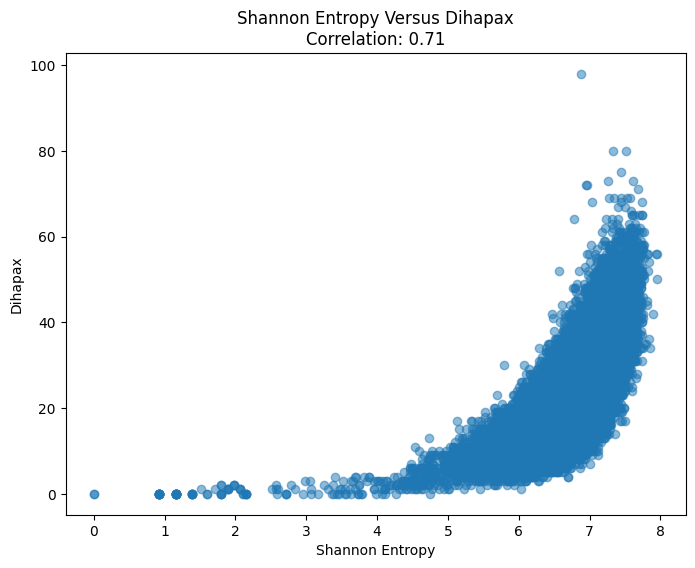

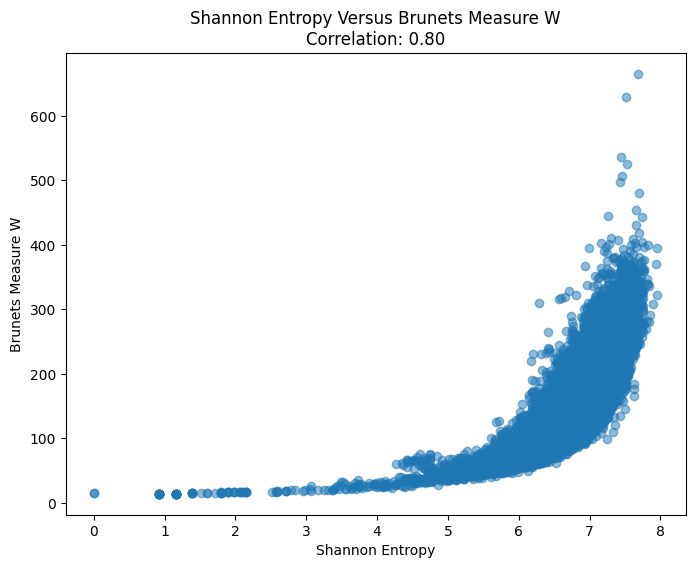

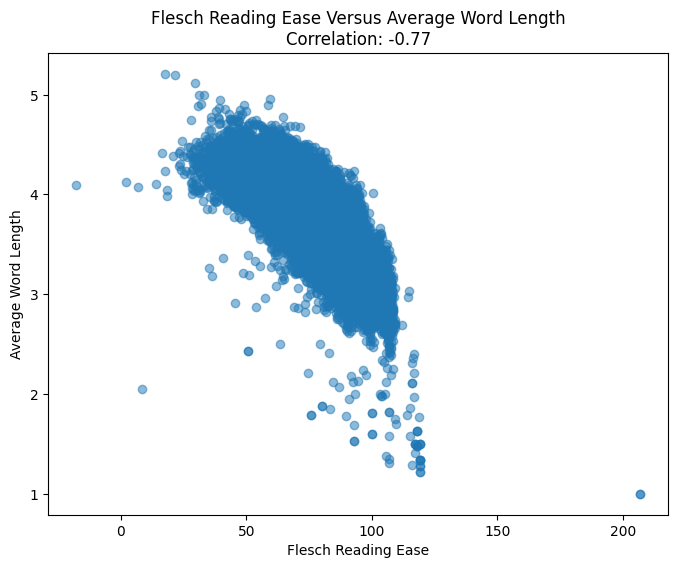

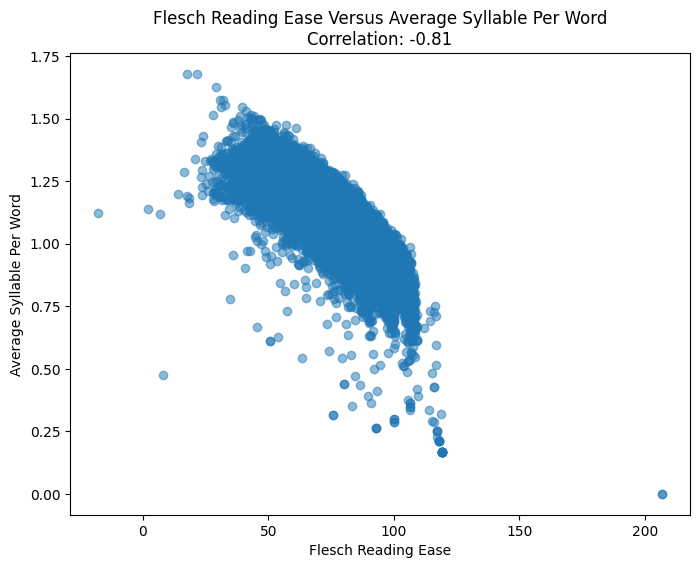

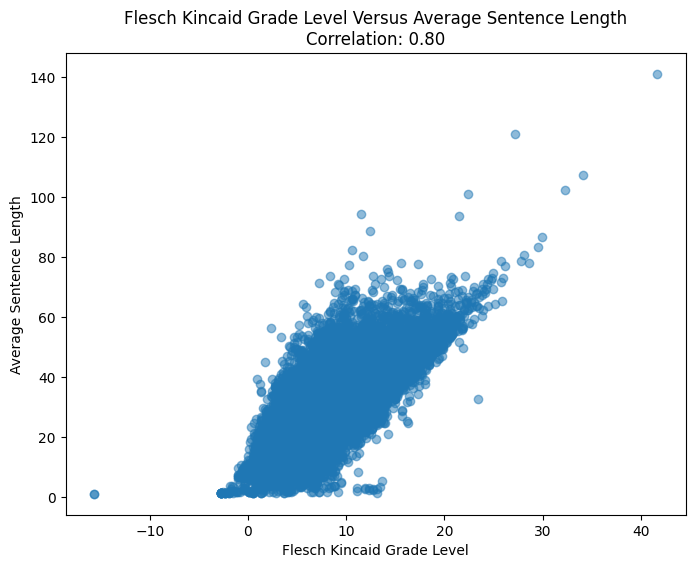

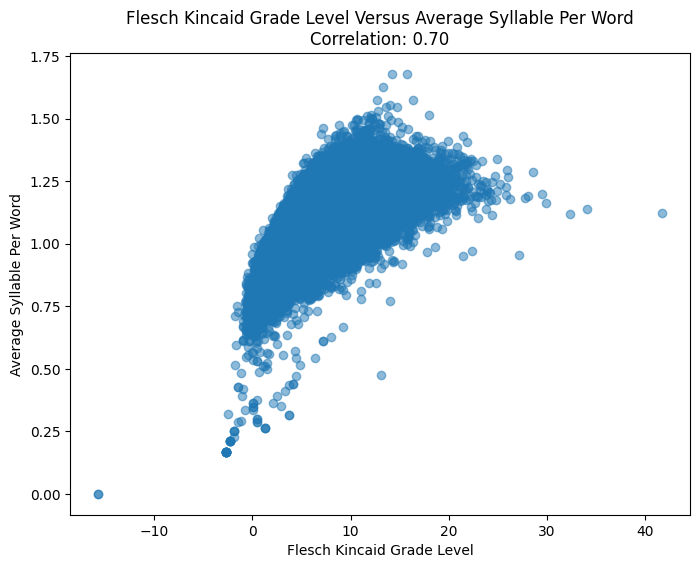

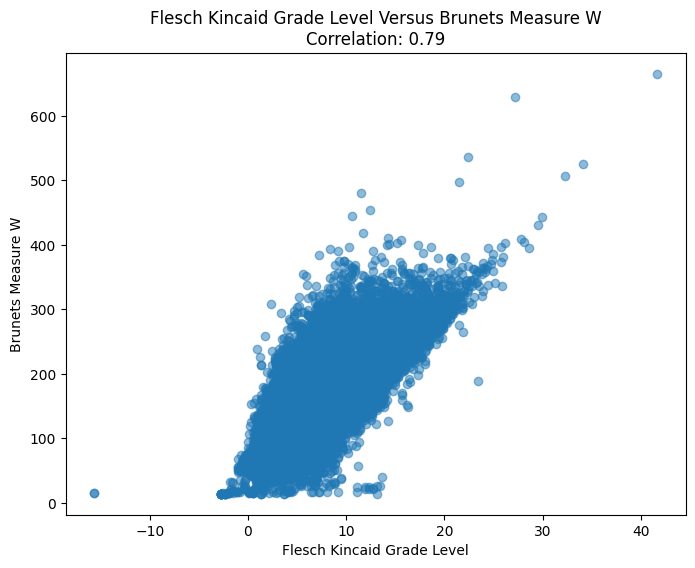

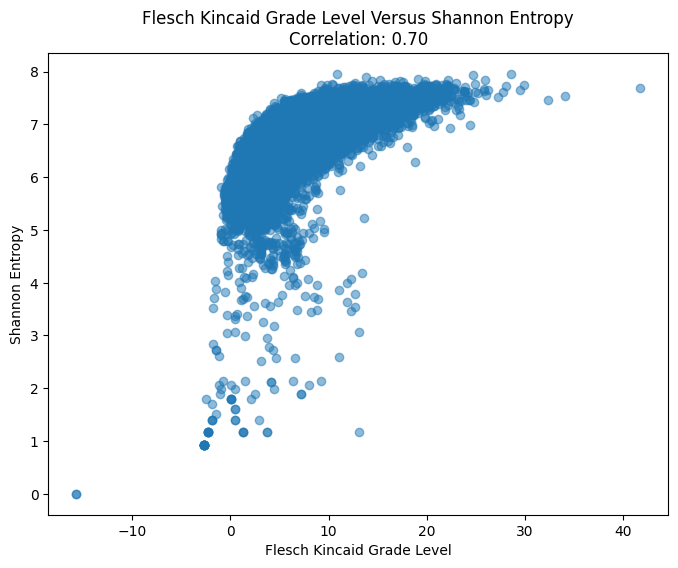

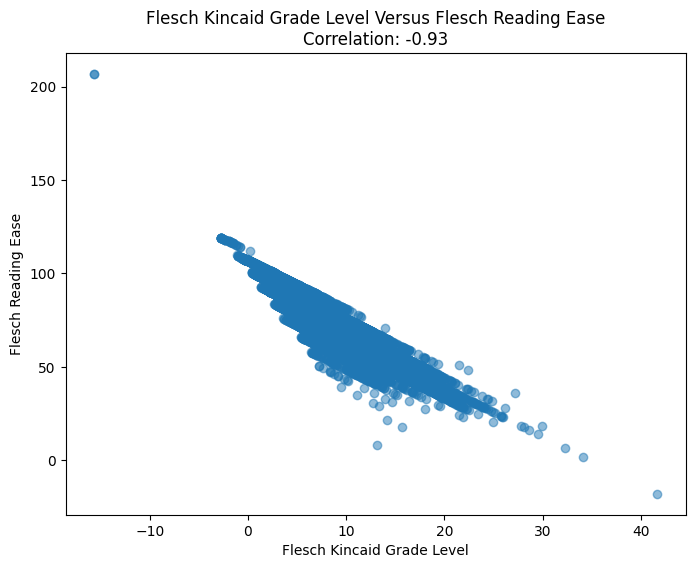

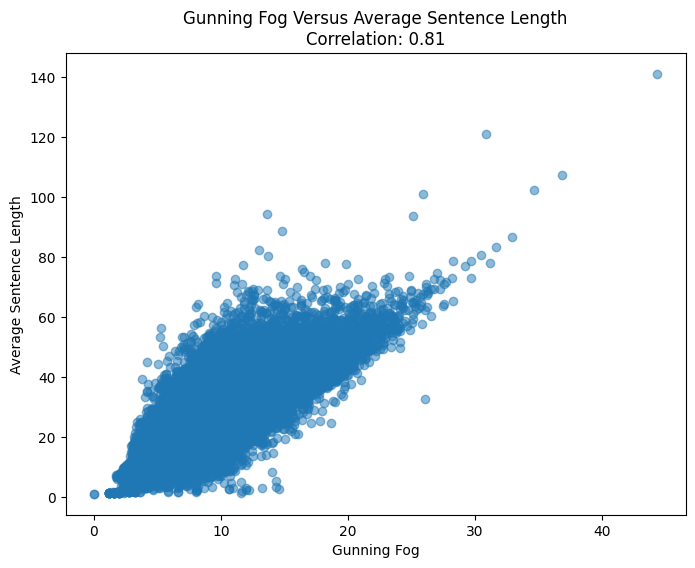

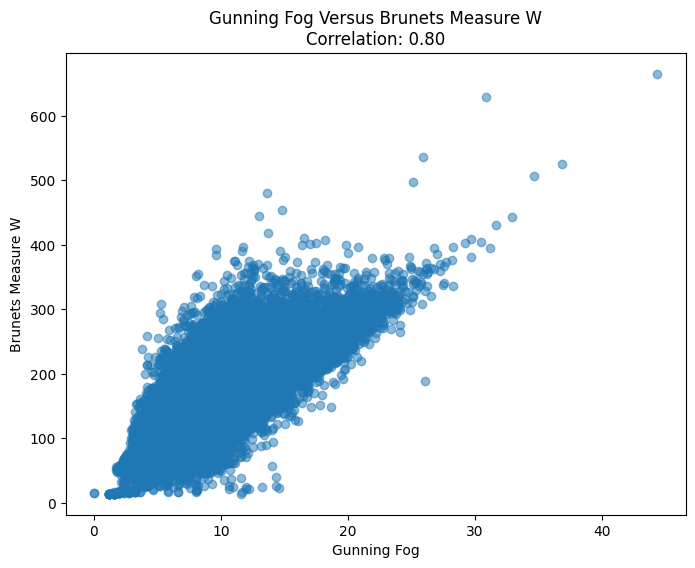

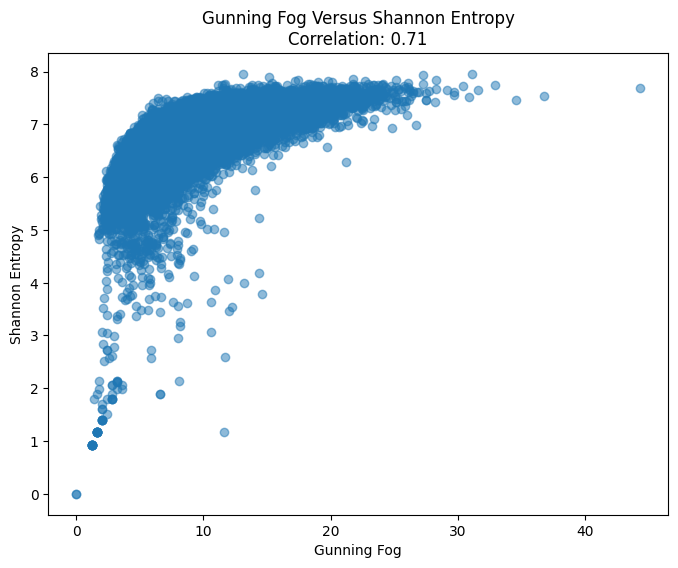

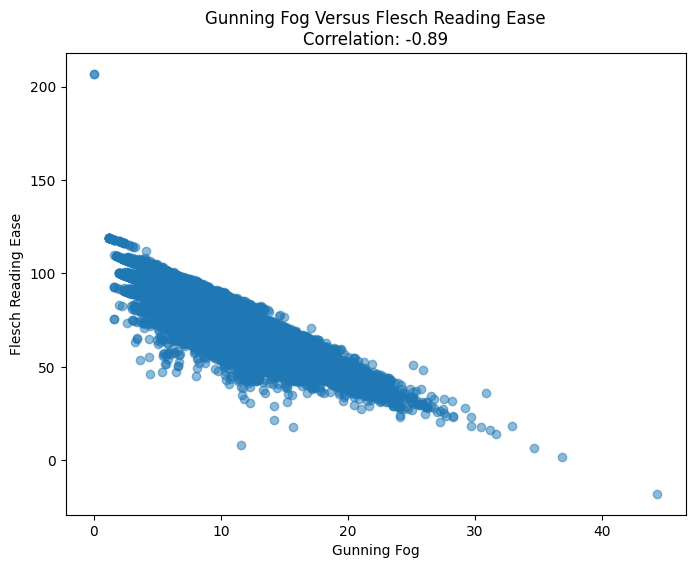

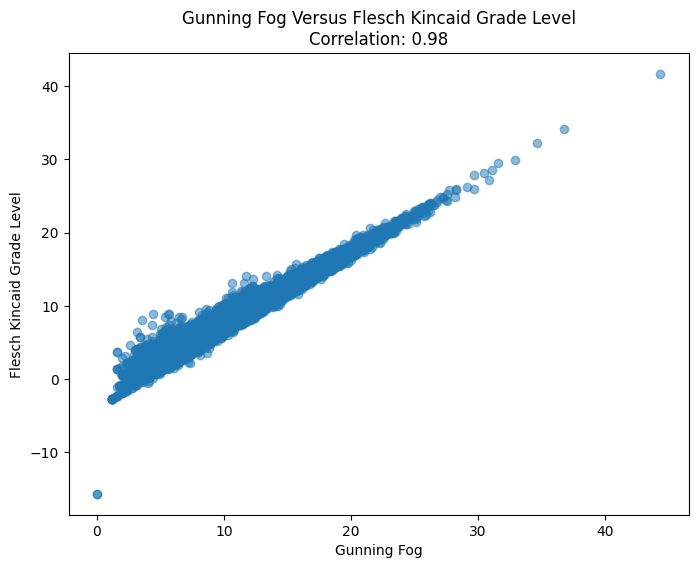

In [43]:
for index, row in high_corr.iterrows():
    feature1 = row['Feature 1']
    feature2 = row['Feature 2']
    correlation = row['Correlation']
    
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature1], df[feature2], alpha=0.5)
    feature1_t = split_camel_case(feature1)
    feature2_t = split_camel_case(feature2)
    plt.title(f'{feature1_t} Versus {feature2_t}\nCorrelation: {correlation:.2f}')
    plt.xlabel(feature1_t)
    plt.ylabel(feature2_t)
    plt.savefig(f'{plots_dir}{feature1}Versus{feature2}.pdf', bbox_inches='tight')
    plt.show()

## Clustering

In [44]:
df = main.copy()

In [45]:
numerical = ['AverageWordLength', 'AverageSentenceLength', 'AverageSyllablePerWord', 'PunctuationCount', 'FunctionalWordsCount', 'TypeTokenRatio', 'HonoreMeasureR', 'Hapax',
       'SichelesMeasureS', 'Dihapax', 'YulesCharacteristicK', 'SimpsonsIndex', 'BrunetsMeasureW', 'ShannonEntropy', 'FleschReadingEase', 'FleschKincaidGradeLevel', 'DaleChallReadability', 'GunningFog']

In [46]:
df_numerical = df[numerical].copy()

In [47]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [48]:
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

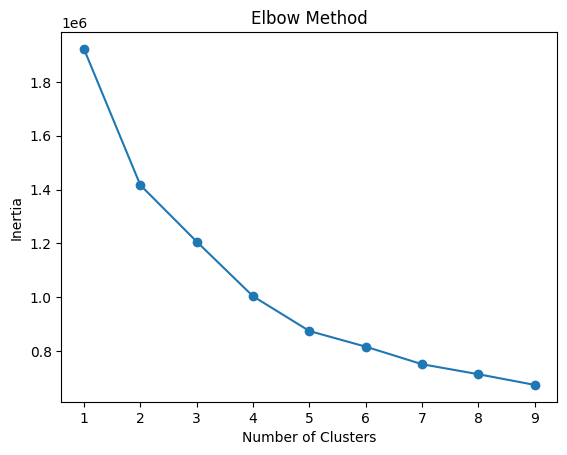

In [49]:
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.savefig(f'{plots_dir}ElbowMethod.pdf', bbox_inches='tight')
plt.show()

In [50]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters

In [51]:
df_numerical['Cluster'] = clusters 
cluster_props = df_numerical.groupby('Cluster').mean()

In [52]:
academic_palette = sns.color_palette('Set1', n_colors=df['Cluster'].nunique())

In [53]:
cluster_props

AverageWordLength  AverageSentenceLength  AverageSyllablePerWord  \
Cluster                                                                     
0                 3.562397              17.531384                1.013635   
1                 3.902506              30.821431                1.143497   
2                 1.793294               1.451741                0.345525   

         PunctuationCount  FunctionalWordsCount  TypeTokenRatio  \
Cluster                                                           
0                0.039922              0.426805        0.549655   
1                0.026561              0.449494        0.506750   
2                0.280969              0.058939        0.320223   

         HonoreMeasureR     Hapax  SichelesMeasureS    Dihapax  \
Cluster                                                          
0            930.454197  0.401368          0.362477  18.269579   
1            980.979983  0.375054          0.334842  27.963965   
2            421.806191  0.255033          0.134352   0.388060   

         YulesCharacteristicK  SimpsonsIndex  BrunetsMeasureW  ShannonEntropy  \
Cluster                                                                         
0                  186.006306       0.981399       111.510434        6.541815   
1                  158.214582       0.984179       180.558323        7.045193   
2                 5271.966557       0.472803        15.621468        1.623082   

         FleschReadingEase  FleschKincaidGradeLevel  DaleChallReadability  \
Cluster                                                                     
0                85.369744                 4.608640              7.278996   
1                69.529425                 9.275918              8.120256   
2               100.913731                 0.440299             13.884179   

         GunningFog  
Cluster              
0          6.820182  
1         11.534152  
2          2.725224

In [54]:
half_columns = len(numerical) // 2
first_half_columns = numerical[:half_columns]
second_half_columns = numerical[half_columns:]
cluster_props_1 = cluster_props[first_half_columns]
cluster_props_2 = cluster_props[second_half_columns]
cluster_props_1 = cluster_props_1.round(1)
cluster_props_2 = cluster_props_2.round(1)

In [55]:
cluster_props_1

AverageWordLength  AverageSentenceLength  AverageSyllablePerWord  \
Cluster                                                                     
0                      3.6                   17.5                     1.0   
1                      3.9                   30.8                     1.1   
2                      1.8                    1.5                     0.3   

         PunctuationCount  FunctionalWordsCount  TypeTokenRatio  \
Cluster                                                           
0                     0.0                   0.4             0.5   
1                     0.0                   0.4             0.5   
2                     0.3                   0.1             0.3   

         HonoreMeasureR  Hapax  SichelesMeasureS  
Cluster                                           
0                 930.5    0.4               0.4  
1                 981.0    0.4               0.3  
2                 421.8    0.3               0.1

In [56]:
cluster_props_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AverageWordLength       3 non-null      float64
 1   AverageSentenceLength   3 non-null      float64
 2   AverageSyllablePerWord  3 non-null      float64
 3   PunctuationCount        3 non-null      float64
 4   FunctionalWordsCount    3 non-null      float64
 5   TypeTokenRatio          3 non-null      float64
 6   HonoreMeasureR          3 non-null      float64
 7   Hapax                   3 non-null      float64
 8   SichelesMeasureS        3 non-null      float64
dtypes: float64(9)
memory usage: 228.0 bytes


In [57]:
cluster_props_1.describe()

AverageWordLength  AverageSentenceLength  AverageSyllablePerWord  \
count           3.000000               3.000000                 3.00000   
mean            3.100000              16.600000                 0.80000   
std             1.135782              14.670719                 0.43589   
min             1.800000               1.500000                 0.30000   
25%             2.700000               9.500000                 0.65000   
50%             3.600000              17.500000                 1.00000   
75%             3.750000              24.150000                 1.05000   
max             3.900000              30.800000                 1.10000   

       PunctuationCount  FunctionalWordsCount  TypeTokenRatio  HonoreMeasureR  \
count          3.000000              3.000000        3.000000        3.000000   
mean           0.100000              0.300000        0.433333      777.766667   
std            0.173205              0.173205        0.115470      309.308525   
min            0.000000              0.100000        0.300000      421.800000   
25%            0.000000              0.250000        0.400000      676.150000   
50%            0.000000              0.400000        0.500000      930.500000   
75%            0.150000              0.400000        0.500000      955.750000   
max            0.300000              0.400000        0.500000      981.000000   

          Hapax  SichelesMeasureS  
count  3.000000          3.000000  
mean   0.366667          0.266667  
std    0.057735          0.152753  
min    0.300000          0.100000  
25%    0.350000          0.200000  
50%    0.400000          0.300000  
75%    0.400000          0.350000  
max    0.400000          0.400000

In [58]:
cluster_props_1.columns

Index(['AverageWordLength', 'AverageSentenceLength', 'AverageSyllablePerWord',
       'PunctuationCount', 'FunctionalWordsCount', 'TypeTokenRatio',
       'HonoreMeasureR', 'Hapax', 'SichelesMeasureS'],
      dtype='object')

In [59]:
cluster_props_2

Dihapax  YulesCharacteristicK  SimpsonsIndex  BrunetsMeasureW  \
Cluster                                                                  
0           18.3                 186.0            1.0            111.5   
1           28.0                 158.2            1.0            180.6   
2            0.4                5272.0            0.5             15.6   

         ShannonEntropy  FleschReadingEase  FleschKincaidGradeLevel  \
Cluster                                                               
0                   6.5               85.4                      4.6   
1                   7.0               69.5                      9.3   
2                   1.6              100.9                      0.4   

         DaleChallReadability  GunningFog  
Cluster                                    
0                         7.3         6.8  
1                         8.1        11.5  
2                        13.9         2.7

In [60]:
cluster_props_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dihapax                  3 non-null      float64
 1   YulesCharacteristicK     3 non-null      float64
 2   SimpsonsIndex            3 non-null      float64
 3   BrunetsMeasureW          3 non-null      float64
 4   ShannonEntropy           3 non-null      float64
 5   FleschReadingEase        3 non-null      float64
 6   FleschKincaidGradeLevel  3 non-null      float64
 7   DaleChallReadability     3 non-null      float64
 8   GunningFog               3 non-null      float64
dtypes: float64(9)
memory usage: 228.0 bytes


In [61]:
cluster_props_2.describe()

Dihapax  YulesCharacteristicK  SimpsonsIndex  BrunetsMeasureW  \
count   3.000000              3.000000       3.000000         3.000000   
mean   15.566667           1872.066667       0.833333       102.566667   
std    14.001548           2944.461447       0.288675        82.861953   
min     0.400000            158.200000       0.500000        15.600000   
25%     9.350000            172.100000       0.750000        63.550000   
50%    18.300000            186.000000       1.000000       111.500000   
75%    23.150000           2729.000000       1.000000       146.050000   
max    28.000000           5272.000000       1.000000       180.600000   

       ShannonEntropy  FleschReadingEase  FleschKincaidGradeLevel  \
count        3.000000           3.000000                 3.000000   
mean         5.033333          85.266667                 4.766667   
std          2.983845          15.700425                 4.452340   
min          1.600000          69.500000                 0.400000   
25%          4.050000          77.450000                 2.500000   
50%          6.500000          85.400000                 4.600000   
75%          6.750000          93.150000                 6.950000   
max          7.000000         100.900000                 9.300000   

       DaleChallReadability  GunningFog  
count              3.000000    3.000000  
mean               9.766667    7.000000  
std                3.601851    4.403408  
min                7.300000    2.700000  
25%                7.700000    4.750000  
50%                8.100000    6.800000  
75%               11.000000    9.150000  
max               13.900000   11.500000

In [62]:
cluster_props_2.columns

Index(['Dihapax', 'YulesCharacteristicK', 'SimpsonsIndex', 'BrunetsMeasureW',
       'ShannonEntropy', 'FleschReadingEase', 'FleschKincaidGradeLevel',
       'DaleChallReadability', 'GunningFog'],
      dtype='object')

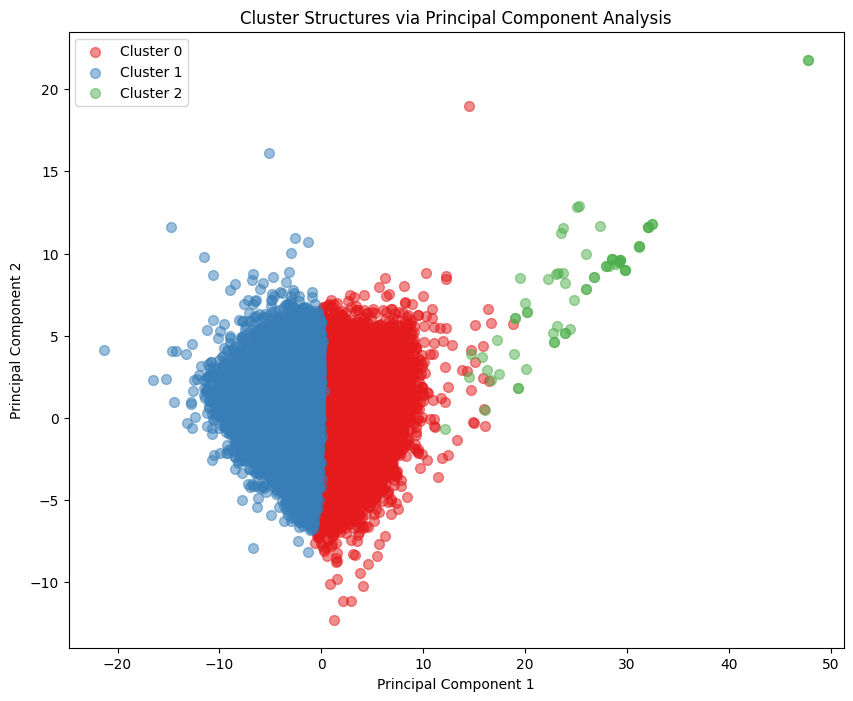

In [63]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


plt.figure(figsize=(10, 8))
for cluster in range(k):
    plt.scatter(df_pca[clusters == cluster, 0], df_pca[clusters == cluster, 1], 
                label=f'Cluster {cluster}', s=50, marker='o',
                color=academic_palette[cluster], alpha=0.5)  

plt.title('Cluster Structures via Principal Component Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.savefig(f'{plots_dir}PCA.pdf', bbox_inches='tight')
plt.show()

In [64]:
unique_books_df = df.drop_duplicates(subset=['Book'])
unique_books_df.reset_index(drop=True, inplace=True)

selected_df = unique_books_df[['Cluster', 'Book', 'Author']].copy()
sorted_df = selected_df.sort_values(by=['Cluster', 'Book'], ascending=[True, True])

In [65]:
sorted_df

Cluster                                               Book  \
0          0                         A Christmas Carol In Prose   
3          0                              A Little Country Girl   
11         0                                   Argonaut Stories   
17         0                                       Defense Mech   
19         0                                  Emily Of New Moon   
..       ...                                                ...   
102        1                                William Shakespeare   
103        1                                Wives And Daughters   
104        1  Worlds Within Worlds- The Story Of Nuclear Ene...   
105        1  Worlds Within Worlds- The Story Of Nuclear Ene...   
106        1  Worlds Within Worlds- The Story Of Nuclear Ene...   

                Author  
0      Charles Dickens  
3       Susan Coolidge  
11         Jack London  
17        Ray Bradbury  
19    L. M. Montgomery  
..                 ...  
102        Victor Hugo  
103  Elizabeth Gaskell  
104       Isaac Asimov  
105       Isaac Asimov  
106       Isaac Asimov  

[108 rows x 3 columns]

In [66]:
latex_table = sorted_df.to_latex()
write(f'{plots_dir}Clusters.txt', latex_table)

In [67]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_scaled)

In [68]:
df_numerical['t-SNE-1'] = tsne_results[:, 0]
df_numerical['t-SNE-2'] = tsne_results[:, 1]

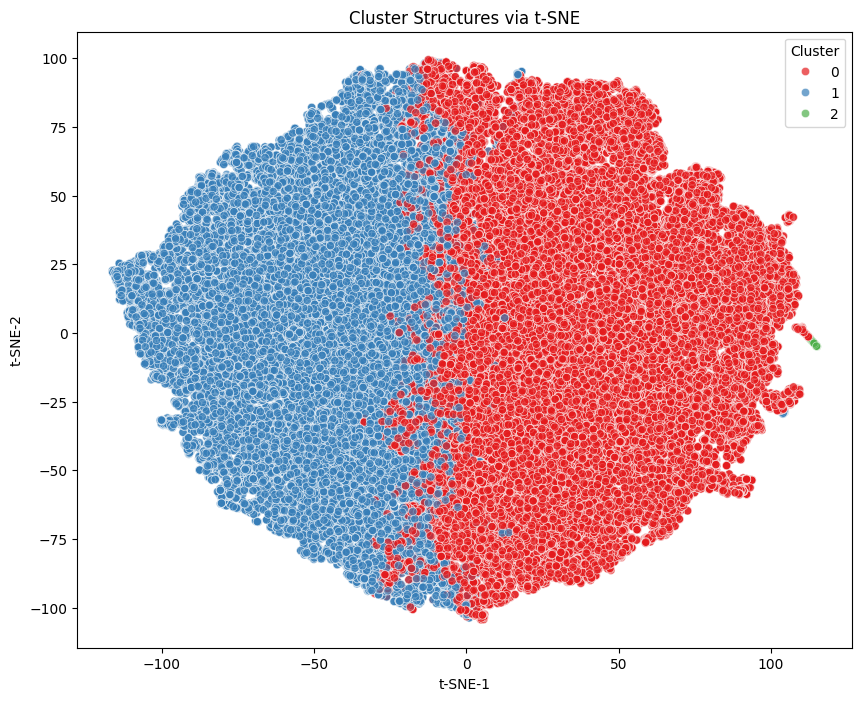

In [69]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="t-SNE-1", y="t-SNE-2",
    hue="Cluster",
    palette=sns.color_palette(academic_palette, k),  
    data=df_numerical,
    legend="full",
    alpha=0.7
)
plt.title('Cluster Structures via t-SNE')
plt.savefig(f'{plots_dir}TSNE.pdf', bbox_inches='tight')
plt.show()

In [70]:
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[ -0.46225198  -0.61302145  -0.50119487   0.37221004  -0.20723858
    0.3469078   -0.26764678   0.20052006   0.11511025  -0.49711332
    0.0617753   -0.0617753   -0.61088676  -0.53588717   0.61841872
   -0.66222633  -0.39699528  -0.65953893]
 [  0.60599555   0.79551453   0.65695616  -0.50425534   0.27946611
   -0.4427032    0.35525043  -0.25574528  -0.14583238   0.64614958
   -0.13054954   0.13054954   0.79310659   0.71080313  -0.80204782
    0.85867099   0.50342329   0.8551332 ]
 [ -6.01035974  -2.31809668  -6.4527114   16.16768565  -8.10366988
   -3.88412661  -6.52042582  -2.34694042  -2.02855697  -2.60833429
   35.24602324 -35.24602324  -2.56174792 -12.7178394    2.011401
   -2.02019991   6.66765366  -1.97504183]]


In [71]:
latex_table = cluster_props_1.to_latex()
write(f'{plots_dir}ClusterProps1.txt', latex_table)

In [72]:
latex_table = cluster_props_2.to_latex()
write(f'{plots_dir}ClusterProps2.txt', latex_table)